#### Τσιμπλιαρίδης Νικόλαος 9652
#### Τζελίλαϊ Τζούλιο 9662

# Εργασία 4

C:\Users\nickt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


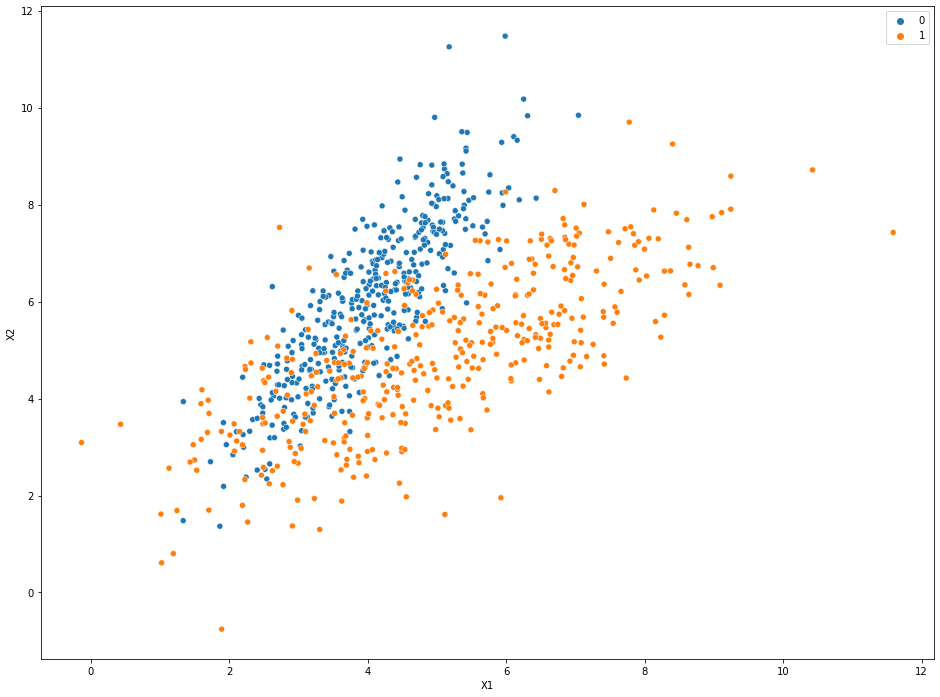

In [1]:
# import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn import metrics

# Όνομα για την κάθε στήλη δεδομένων του dataframe
cnames = ['X1', 'X2', 'Class']

#||||||||| Αντικαθοστούμε το path του training set μετά το r ||||||||||#
df_train = pd.read_csv(r'C:\Users\nickt\PatternRecognition\Dataset.csv', names = cnames, engine='python')

# Χωρίζουμε το df σε τιμές δεδομένων και κλάσεις και τα μετατρέπουμε σε numpy arrays
Xm = df_train.loc[:, 'X1':'X2']
ym = df_train.loc[:, 'Class']
X_train = Xm.to_numpy()
y_train = ym.to_numpy()

# Πλοτάρουμε σε ένα scatter-plot τα δεδομένα μας
plt.figure(figsize=(16,12))
sns.scatterplot(X_train[:, 0], X_train[:, 1], hue=y_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

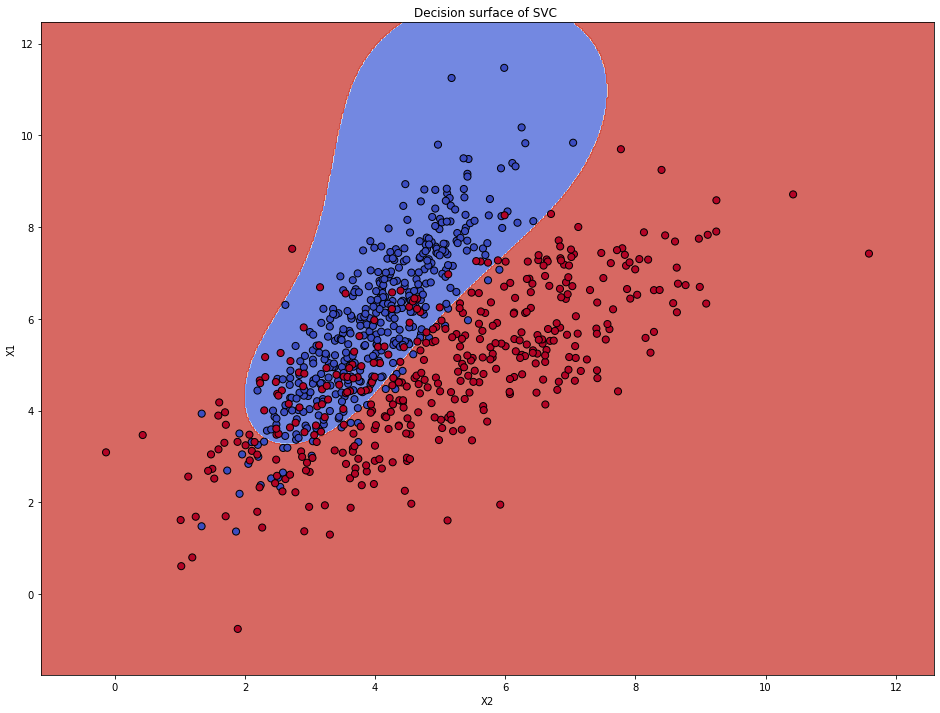

In [2]:

# Επιλέγουμε να εκπαιδεύσουμε το μοντέλο μας με SVM και radial basis function για kernel
model = svm.SVC(kernel='rbf')
clf = model.fit(X_train, y_train)

# Φτιάχνουμε το figure
plt.figure(figsize = (16,12))

X1, X2 = X_train[:, 0], X_train[:, 1]
# Υπολογίζουμε το ελάχιστο και το μ΄έγιστο για το mesh-grid που θα φτιάξουμε και παίρνουμε όλες τις τιμές ανά 0.02 (σε x και y)
x_min, x_max = X1.min() - 1, X1.max() + 1
y_min, y_max = X2.min() - 1, X2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Κάνουμε predict για όλες τις τιμές του meshgrid και το αποθηκεύουμε στο Z το οποίο μετατρέπουμε από μονοδιάστατο 
# σε διδιάστατο array και στην συνέχεια το κάνουμε πλοτ
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Εμφανίζουμε και τα σημεία για τα δεδομένα μας στο ίδιο διάγραμμα
plt.scatter(X1, X2, c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors="k")
plt.ylabel("X1")
plt.xlabel("X2")
plt.title('Decision surface of SVC ')
plt.show()

In [3]:
c2names = ['X1', 'X2']

#||||||||| Αντικαθοστούμε το path του DatasetVal μετά το r ||||||||||#
dfx_test = pd.read_csv(r'C:\Users\nickt\PatternRecognition\DatasetVal.csv', names = c2names, engine='python')

# Μετατρέπουμε σε numpy array
Xm2 = dfx_test.loc[:, 'X1':'X2']
X_test = Xm2.to_numpy()

# Προβλέπουμε το classification στο test set και το αποθηκεύουμε στο y_pred
y_pred = clf.predict(X_test)



In [4]:
#||||||||| Αντικαθοστούμε το path του Labels μετά το r ||||||||||#
dfy_test = pd.read_csv(r'C:\Users\nickt\PatternRecognition\Labels.csv', names = ['Class'], engine='python' )

# Μετατρέπουμε σε numpy array
ym2 = dfy_test.loc[:, 'Class']
y_test = ym2.to_numpy()

# To metrics.accuracy_score συγκρίνει το y_pred με τα σωστά classification και βγάζει το accuracy 
# το οποίο εκτυπώνουμε με ακρίβεια 2 δεκαδικών ψηφείων
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred) * 100))

Accuracy: 91.00%
